# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib_venn import venn2

import community    # pip install python-louvain

# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
from graph import *

# from OmicsIntegrator import *

interactome_file = "/Users/alex/Documents/OmicsIntegrator2/data/iref13.cleaned.connected.tsv"
prize_file = "/Users/alex/Documents/OmicsIntegrator2/data/prizes.tsv"
# prize_file = "/Users/alex/Desktop/G3s_prizes_.oi2.prizes"
graph = Graph(interactome_file, {'a':1000000, 'interactome_is_clean_I_promise':True})

graph.prepare_prizes(prize_file)


11:43:28 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
11:43:28 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
11:43:28 - Graph: INFO - Members of the prize file not present in the interactome:
11:43:28 - Graph: INFO - ['CALM1', 'KIAA1543', 'PKM2', 'PLEC1', 'RBM14', 'SFRS1']


In [2]:
vertex_indices, edge_indices = graph.pcsf()

In [3]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/src/graph.py:345: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  nx.set_node_attributes(forest, self.node_attributes.loc[list(forest.nodes())].dropna(how='all').to_dict(orient='index'))


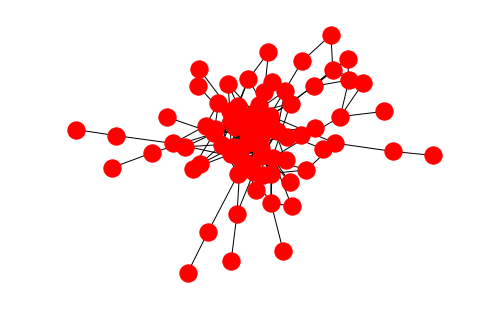

In [4]:
nx.draw_spring(augmented_forest)

In [5]:
graph.pcsf_objective_value(forest)

20.350854129999981

In [6]:
get_networkx_graph_as_dataframe_of_nodes(forest).head()

,degree,prize
ABI3,26.0,0.00
ATG12,67.0,0.00
BCAR1,78.0,0.29
CASP6,52.0,0.00
CD47,18.0,0.00


In [ ]:
from graph import output_networkx_graph_as_interactive_html

In [2]:
output_networkx_graph_as_interactive_html(augmented_forest, '.')

NameError: name 'output_networkx_graph_as_interactive_html' is not defined